In [1]:
#####################
# importing modules #
#####################

import os # os allows you to interface with the underlying operating system that Python is running on – be that Windows, Mac or Linux. 
import sys # sys module contains system-level information, such as the version of Python you're running
#sys.path.append('/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages')

import nltk #"Natural Language Toolkit"

# or just import specific nltk modules 
from nltk.corpus.reader.plaintext import PlaintextCorpusReader, CategorizedPlaintextCorpusReader
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.collocations import BigramCollocationFinder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
print(os.getcwd()) # find out the current directory

/Users/Fiona_Shen_Bayh/2017/NLP 2017


In [3]:
# if necessary, change the directory

os.chdir("/Users/Fiona_Shen_Bayh/2015/Web_Scraping/LexisNexis+Round+2/corruption_sentiment") #new file path
print(os.getcwd())

/Users/Fiona_Shen_Bayh/2015/Web_Scraping/LexisNexis+Round+2/corruption_sentiment


In [4]:
# take a look at the files in the directory

new_directory =  "/Users/Fiona_Shen_Bayh/2015/Web_Scraping/LexisNexis+Round+2/corruption_sentiment" #store file path as object
text_corpus = PlaintextCorpusReader(new_directory, '.*\.csv') #this will grab all .csv files in the folder specified by new_directory
for infile in sorted(text_corpus.fileids()): 
    print(infile)


NYT+WP_Anti-Corrupt_copy.csv
NYT+WP_IMF_copy.csv
NYT+WP_PM_copy.csv
NYT+WP_wb_copy.csv
News_1_Afr.csv
News_2_Afr.csv
News_3_Afr.csv
News_4_Afr.csv


In [6]:
#######################
# Pre-processing text #
#######################

""" Storing text data 

    To load the data from the csv file into python, it helps to look at the raw csv file.
    Looking at the csv file, we can see that each row is a separate article.
    Let's focus on three categories: article date, country tags, and the body of text
    Let's also focus on one of the documents, New York Times and Washington Post articles about the IMF """

documents = [] #generates an empty list

import csv
with open("NYT+WP_IMF_copy.csv", encoding="ISO-8859-1") as csvfile:
    list_reader = csv.reader(csvfile)
    for row in list_reader:
        documents.append((row[0], row[1], row[2])) #list of tuples, where each tuple represents the date, country, and text of a news article


###################
# Filtering words #
###################

# Extremely common words (stop words) are often excluded from the vocabulary 
# But certain stop words may be important
# It is up to the user to decide which stop words may be relevant
# Below, I create a custom set of stop words, extracting certain words that may be useful for the analysis

stopset = list(set(stopwords.words('english')) - set(('over', 'under', 'below', 'more', 'most', 'no', 'not', 'only', 'such', 'few', 'too', 'very', 'just', 'any', 'once')))


# Narrowing the search to African countries

countries = ["Africa", "Africans" , "Algeria", "Angola", 
                 "Benin", "Botswana", "Burkina Faso", "Burundi", 
                 "Cameroon", "Cape Verde", "Central African Republic", "Chad", 
                 "Democratic Republic of the Congo", "Kinshasa", "Zaire", "Djibouti", 
                 "Egypt", "Equatorial Guinea", "Eritrea", "Ethiopia", 
                 "Gabon", "Gambia", "Ghana", "Guinea Bissau", "Guinea", 
                 "Ivory Coast", 
                 "Kenya", 
                 "Lesotho", "Liberia", "Libya", 
                 "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", 
                 "Namibia", "Niger", "Nigeria", 
                 "Republic of the Congo", "Brazzaville", "Reunion", "Rwanda", 
                 "Senegal", "Seychelles", "Sierra Leone", "Sao Tome", "Principe", "Somalia", "South Africa", "South African", "Sudan", "Swaziland", 
                 "Tanzania", "Togo", "Tunisia", "Uganda", 
                 "Zambia", "Zanzibar", "Zimbabwe"]

all_countries = [word.lower() for word in countries] #convert to lower case



# put it all together

docs = []
for item in documents:
    tokens = word_tokenize(item[2])
    words = [w.lower() for w in tokens if w.isalpha()]
    filtered_words = [word for word in words if word not in stopset and word not in all_countries]
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    date = item[0]
    country = item[1]
    tup = (date, country, stemmed_words)
    docs.append(tup)

docs[2] #check out a random item in the list

  'west',
  'germani',
  'netherland',
  'itali',
  'japan',
  'canada',
  'iran',
  'well',
  'imf',
  'world',
  'bank',
  'execut',
  'committe',
  'european',
  'common',
  'market',
  'offici',
  'meet',
  'tri',
  'agre',
  'recommend',
  'initi',
  'million',
  'million',
  'emerg',
  'aid',
  'program',
  'food',
  'medicin',
  'humanitarian',
  'suppli',
  'over',
  'next',
  'three',
  'month',
  'agre',
  'principl',
  'meet',
  'pari',
  'earlier',
  'month',
  'mobutu',
  'plan',
  'howev'])

In [5]:
##############################
# Importing all of the files #
##############################

""" now that we've seen how to pre-process text data, let's load all of the data to speed up this process, 
    let's write a function which takes a CSV file as input and returns a dataframe as output"""

import pandas as pd

def split_articles(filename):
    """Split csv file into separate articles."""
    the_file = open("/Users/Fiona_Shen_Bayh/2015/Web_Scraping/LexisNexis+Round+2/corruption_sentiment/" + filename, 'r', encoding="ISO-8859-1")
    df = pd.read_csv(the_file)
    articles = df.TEXT # dataframe can be indexed with a '.'
    return articles
    
# run the function for each csv file
anti = split_articles("NYT+WP_Anti-Corrupt_copy.csv")
imf = split_articles("NYT+WP_IMF_copy.csv")
wb = split_articles("NYT+WP_wb_copy.csv")
pm = split_articles("NYT+WP_PM_copy.csv")

# combine the individual dataframes into a single dataframe
frames = [anti, imf, wb, pm]
all_the_docs = pd.concat(frames)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=10, max_df=.95, decode_error='replace', stop_words='english') 

"""What's this function doing?
    CountVectorizer class gathers word frequencies (or term frequencies) associated with texts into a document-term matrix.
    min_df: discard words appearing in less than n documents, in large corpus this may be set to 15 or higher to eliminate very rare words
    max_df: discard words appearing in more than n documents
    decode_error: if a byte sequence contains characters that aren't part of the given encoding, a UnicodeDecodeError will be raised. To prevent this, specify ‘ignore’ or ‘replace’.
    stop_words: removes 'english' language stopwords """

#Document term matrix    
dtm = vectorizer.fit_transform(all_the_docs.values.astype('U')) 
""" all_the_docs is a dataframe, but vectorizer needs string as input
    so we convert the dataframe to a unicode string object"""

vocab = vectorizer.get_feature_names()
    
""" Now we have a document-term matrix (dtm) and a vocabulary list (vocab)."""

print(dtm)
print(vocab)

  (0, 589)	3
  (0, 2001)	21
  (0, 3334)	1
  (0, 4748)	1
  (0, 0)	2
  (0, 4468)	2
  (0, 6092)	5
  (0, 1286)	2
  (0, 4149)	1
  (0, 3084)	1
  (0, 1199)	1
  (0, 3713)	5
  (0, 1936)	3
  (0, 626)	1
  (0, 7700)	2
  (0, 1921)	2
  (0, 3517)	8
  (0, 7639)	3
  (0, 3655)	1
  (0, 2769)	2
  (0, 3043)	5
  (0, 2022)	4
  (0, 9031)	4
  (0, 5178)	1
  (0, 6379)	1
  :	:
  (1866, 7707)	1
  (1866, 102)	4
  (1866, 6741)	1
  (1866, 8504)	2
  (1866, 2)	1
  (1866, 6543)	1
  (1866, 4651)	1
  (1866, 664)	2
  (1866, 6554)	1
  (1866, 8163)	1
  (1866, 8876)	1
  (1866, 2572)	1
  (1866, 2046)	1
  (1866, 7231)	1
  (1866, 6838)	1
  (1866, 5117)	1
  (1866, 6504)	2
  (1866, 3604)	1
  (1866, 953)	1
  (1866, 3885)	1
  (1866, 2079)	1
  (1866, 422)	3
  (1866, 2337)	1
  (1866, 9068)	1
  (1866, 4297)	1
['000', '05', '06', '10', '100', '101', '103', '105', '108', '10th', '11', '110', '11th', '12', '120', '125', '13', '130', '14', '140', '147', '15', '150', '16', '160', '16th', '17', '170', '18', '180', '1847', '19', '193', '1948'

In [7]:
""" Now convert vocab, a list storing our vocabulary words, into a NumPy array. 
    We do this because an array supports a greater variety of operations than a list."""

import numpy as np
vocab = np.array(vocab)

print(vocab[0:500]) #take a look at the first 500 entries, notice it's no longer a list

['000' '05' '06' '10' '100' '101' '103' '105' '108' '10th' '11' '110'
 '11th' '12' '120' '125' '13' '130' '14' '140' '147' '15' '150' '16' '160'
 '16th' '17' '170' '18' '180' '1847' '19' '193' '1948' '1949' '1950'
 '1950s' '1952' '1957' '1958' '1959' '1960' '1960s' '1961' '1962' '1963'
 '1964' '1965' '1966' '1967' '1968' '1969' '1970' '1970s' '1971' '1972'
 '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980' '1980s' '1981'
 '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990' '1990s'
 '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '19th' '20'
 '200' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008'
 '2009' '2010' '2011' '2012' '2013' '2014' '2015' '205' '20th' '21' '210'
 '21st' '22' '220' '225' '23' '24' '240' '25' '250' '26' '260' '27' '270'
 '28' '29' '30' '300' '31' '32' '33' '330' '34' '35' '350' '36' '360' '37'
 '38' '380' '39' '40' '400' '41' '42' '43' '44' '45' '450' '46' '47' '48'
 '49' '50' '500' '51' '52' '53' '54' '55' '56' '57' '5

In [8]:
##################
# TOPIC MODELING #
##################

""" A “non-negative matrix” is a matrix containing non-negative values (i.e. zero or positive word frequencies).
    Non-negative matrix factorization (NMF) is often characterized as a machine learning algorithm
    It strongly resembles Latent Dirichlet Allocation (LDA), which is a probabilistic model of the corpus
    Whereas LDA expresses uncertainty about placement of topics across texts and assignment of words to topics,
        NMF is a deterministic algorithm that arrives at a single representation of the corpus
        Both NMF and LDA take a corpus and uncover “latent topics” 
        
        In what follows, let's start with an NMF topic model"""

from sklearn import decomposition

num_topics = 10 #number of latent topics

num_top_words = 25 #number of words per topic

clf = decomposition.NMF(n_components=num_topics, random_state=1)

doctopic = clf.fit_transform(dtm)

topic_words = []

for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])
    
topic_words

doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True) # scale the document-component matrix such that the component values associated with each document sum to one

print(topic_words) #vocabulary for each topic
print(doctopic) #the document topic matrix, where each numerical entry in the matrix is associated with a given document

[['said', 'officials', 'united', 'minister', 'corruption', 'people', 'president', 'police', 'million', 'group', 'official', 'states', 'general', 'company', 'year', '000', 'business', 'nations', 'american', 'report', 'congo', 'rights', 'new', 'companies', 'state'], ['mr', 'president', 'said', 'united', 'american', 'states', 'years', 'officials', 'bush', 'like', 'shell', 'administration', 'country', 'lawyers', 'time', 'began', 'government', 'kibaki', 'group', 'house', 'leaders', 'trial', 'minister', 'kabila', 'chiluba'], ['bank', 'world', 'corruption', 'countries', 'wolfowitz', 'money', 'oil', 'chad', 'international', 'project', 'said', 'development', 'officials', 'poor', 'aid', 'fund', 'companies', 'corrupt', 'million', 'board', 'billion', 'debt', 'loans', 'country', 'year'], ['mobutu', 'zaire', 'country', 'zairian', 'power', 'government', 'western', 'congo', 'kabila', 'kinshasa', 'president', 'political', 'years', 'economic', 'foreign', 'army', 'zairians', 'time', 'percent', 'war', 'mi

In [9]:
# average topic shares associated with the same search terms

new_directory =  "/Users/Fiona_Shen_Bayh/2015/Web_Scraping/LexisNexis+Round+2/corruption_sentiment" #store file path as object
text_corpus = PlaintextCorpusReader(new_directory, '.*\.csv')
filenames = text_corpus.fileids()

NYT_WP_files = filenames[:4] #the last four items in the directory are the NYT+WP files

search_terms = []

for fn in NYT_WP_files:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    search_terms.append(name) 

# turn this into an array so we can use NumPy functions
search_terms = np.asarray(search_terms)

doctopic_orig = doctopic.copy()

# preprocess
num_groups = len(set(search_terms))

doctopic_grouped = np.zeros((num_groups, num_topics))

for i, name in enumerate(sorted(set(search_terms))):
    doctopic_grouped[i, :] = np.mean(doctopic[search_terms == name, :], axis=0)

doctopic = doctopic_grouped

terms = sorted(set(search_terms)) # each csv file represents a different search term

print("Top NMF topics in...")

""" Topic shares associated with a set of documents can be interpreted in terms of word frequencies, i.e. how many times a given word appears in a given topic
    Python uses 0-based indexing, so the first topic is topic 0."""

for i in range(len(doctopic)):
    top_topics = np.argsort(doctopic[i,:])[::-1][0:3]
    top_topics_str = ' '.join(str(t) for t in top_topics)
    print("{}: {}".format(terms[i], top_topics_str)) # the numbers represent the top 3 topics for each search document
    
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15]))) #prints top 15 words associated with each topic

Top NMF topics in...
NYT+WP_Anti-Corrupt_copy: 2 9 5
NYT+WP_IMF_copy: 5 2 9
NYT+WP_PM_copy: 2 5 1
NYT+WP_wb_copy: 7 1 4
Topic 0: said officials united minister corruption people president police million group official states general company year
Topic 1: mr president said united american states years officials bush like shell administration country lawyers time
Topic 2: bank world corruption countries wolfowitz money oil chad international project said development officials poor aid
Topic 3: mobutu zaire country zairian power government western congo kabila kinshasa president political years economic foreign
Topic 4: oil nigeria government nigerian country military shell nigerians people money company abacha obasanjo million years
Topic 5: kenya moi government corruption kibaki kenyan kenyans country president political nairobi aid opposition kenyatta western
Topic 6: mandela south africa government african black party white president zuma national mbeki apartheid mrs congress
Topic 7:

/Users/Fiona_Shen_Bayh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1867 but corresponding boolean dimension is 4


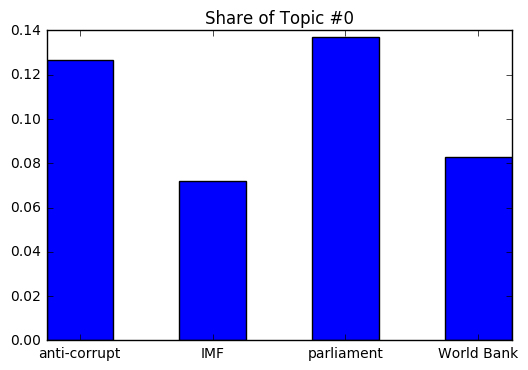

In [12]:
#########
# Plots #
#########

import matplotlib
import matplotlib.pyplot as plt

#matplotlib.get_backend()

N, K = doctopic.shape

ind = np.arange(N)  # points on the x-axis

width = 0.5

plt.bar(ind, doctopic[:,0], width=width)

xlabels = ['anti-corrupt','IMF','parliament','World Bank']

plt.xticks(ind + width/2, xlabels)  # put labels in the center

plt.title('Share of Topic #0')

plt.show()

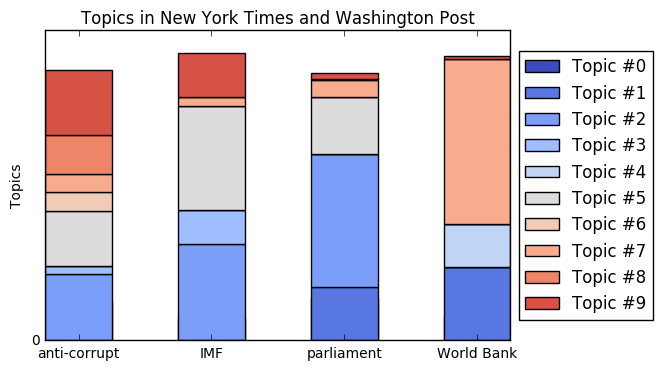

In [13]:
###########
# Plots 2 #
###########

import numpy as np

import matplotlib.pyplot as plt

N, K = doctopic.shape  # N documents, K topics

ind = np.arange(N)  # the x-axis locations for the novels

width = 0.5  # the width of the bars

plots = []

height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
        height_cumulative += doctopic[:, k]
        plots.append(p)

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1

plt.ylabel('Topics') #y-axis label
plt.yticks(np.arange(0, 1, 10)) #y-axis ticks

plt.title('Topics in New York Times and Washington Post') #plot title

xlabels = ['anti-corrupt','IMF','parliament','World Bank'] #x-axis labels
plt.xticks(ind+width/2, xlabels) #placement and naming of x-axis ticks

topic_labels = ['Topic #{}'.format(k) for k in range(K)] # {} will become topic 1:K

# see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend for more details on making a legend in matplotlib

#plt.legend([p[0] for p in plots], topic_labels)
plt.legend(topic_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

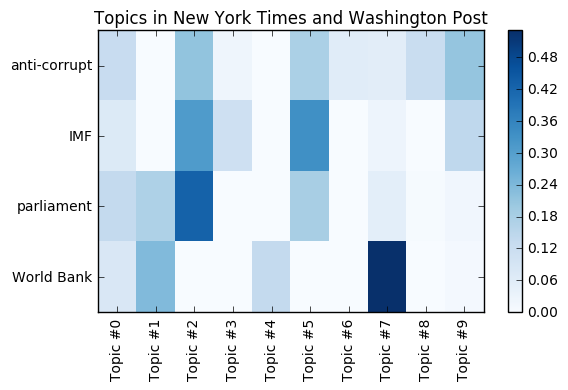

In [14]:
##########
# PLOT 3 #
##########

plt.pcolor(doctopic, norm=None, cmap='Blues')

# put the major ticks at the middle of each cell
# the trailing semicolon ';' suppresses output

filenames = ['anti-corrupt','IMF','parliament','World Bank']
topic_labels = ['Topic #{}'.format(k) for k in range(K)]

plt.title('Topics in New York Times and Washington Post')
plt.yticks(np.arange(doctopic.shape[0])+0.5, filenames);
plt.xticks(np.arange(doctopic.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')

plt.tight_layout()  # fixes margins

plt.show()

In [15]:
###################################################################
# REDOING THE ABOVE, THIS TIME WITH BOTH WESTERN AND AFRICAN NEWS #
###################################################################

import pandas as pd

# create a splitting function which takes a csv as input and returns a dataframe where each row is a different body of text
def split_articles(filename):
    """Split csv file into its separate articles."""
    the_file = open("/Users/Fiona_Shen_Bayh/2015/Web_Scraping/LexisNexis+Round+2/corruption_sentiment/" + filename, 'r', encoding="ISO-8859-1")
    df = pd.read_csv(the_file)
    articles = df.TEXT # dataframe can be indexed with a '.'
    return articles

#WESTERN NEWS
west_anti = split_articles("NYT+WP_Anti-Corrupt_copy.csv")
west_imf = split_articles("NYT+WP_IMF_copy.csv")
west_wb = split_articles("NYT+WP_wb_copy.csv")
west_pm = split_articles("NYT+WP_PM_copy.csv")

#AFRICAN NEWS
afr_anti = split_articles("News_1_Afr.csv")
afr_imf = split_articles("News_2_Afr.csv")
afr_wb = split_articles("News_3_Afr.csv")
afr_pm = split_articles("News_4_Afr.csv")

# combine the individual dataframes into a single dataframe
frames = [west_anti, west_imf, west_wb, west_pm, afr_anti, afr_imf, afr_wb, afr_pm]
all_the_docs_w_afr = pd.concat(frames)

from sklearn.feature_extraction.text import CountVectorizer

#CountVectorizer class gathers word frequencies (or term frequencies) associated with texts into a document-term matrix. 
vectorizer = CountVectorizer(min_df=10, max_df=.95, decode_error='replace', stop_words='english') 
    #min_df, discard words appearing in less than n documents, in large corpus this may be set to 15 or higher to eliminate very rare words
    #max_df, discard words appearing in more than n documents
    #decode_error, instructinos for when a byte sequence contains characters not of the given encoding. By default, it is ‘strict’, meaning that a UnicodeDecodeError will be raised. Other values are ‘ignore’ and ‘replace’.
    #stop_words, built-in stop word list for 'english' will be removed from the resulting tokens. 

#Document term matrix    
dtm_w_afr = vectorizer.fit_transform(all_the_docs_w_afr.values.astype('U')) 
    #all_the_docs is a dataframe, but vectorizer needs a string as input, so we convert the dataframe to a unicode string object
vocab_w_afr = vectorizer.get_feature_names()
    
# Now we have a document-term matrix and a vocabulary list. Note that this is a sparse martrix.
# We will convert vocab, the Python list storing our vocabulary, into a NumPy array because an array supports a greater variety of operations than a list.

vocab_w_afr = np.array(vocab_w_afr)

from sklearn import decomposition

num_topics_w_afr = 10 #number of latent topics

num_top_words_w_afr = 25 #number of words per topic

clf_w_afr = decomposition.NMF(n_components=num_topics_w_afr, random_state=1)

doctopic_w_afr = clf_w_afr.fit_transform(dtm_w_afr)

topic_words_w_afr = []

for topic in clf_w_afr.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words_w_afr]
    topic_words_w_afr.append([vocab_w_afr[i] for i in word_idx])
    

# scale the document-component matrix such that the component values associated with each document sum to one
doctopic_w_afr = doctopic_w_afr / np.sum(doctopic_w_afr, axis=1, keepdims=True)

# average topic shares across western and african press

new_directory =  "/Users/Fiona_Shen_Bayh/2015/Web_Scraping/LexisNexis+Round+2/corruption_sentiment" #store file path as object
text_corpus = PlaintextCorpusReader(new_directory, '.*\.csv')

filenames = text_corpus.fileids()

search_terms = []

for fn in filenames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    search_terms.append(name) 

# turn this into an array so we can use NumPy functions
search_terms = np.asarray(search_terms)

doctopic_orig_w_afr = doctopic_w_afr.copy()

# preprocess
num_groups_w_afr = len(set(search_terms))
#num_groups_w_afr = 2 # 2 groups are Western and African press



doctopic_grouped_w_afr = np.zeros((num_groups_w_afr, num_topics_w_afr))

for i, name in enumerate(sorted(set(search_terms))):
    doctopic_grouped_w_afr[i, :] = np.mean(doctopic_w_afr[search_terms == name, :], axis=0)
    
    
#for fn in enumerate(sorted(set(search_terms))):                        
#    if "African_" in fn:
#        doctopic_grouped_w_afr[i, :] = np.mean(doctopic_w_afr[search_terms=="African", :], axis=0)
#    elif "NYT+WP_" in fn:
#        doctopic_grouped_w_afr[i, :] = np.mean(doctopic_w_afr[search_terms=="Western", :], axis=0)

                           
doctopic_w_afr = doctopic_grouped_w_afr

terms = sorted(set(search_terms)) # each csv file represents a different search term

print("Top NMF topics in...")

# Topic shares associated with a set of documents can be interpreted in terms of word frequencies.
# Python uses 0-based indexing, so the first topic is topic 0.
for i in range(len(doctopic_w_afr)):
    top_topics = np.argsort(doctopic_w_afr[i,:])[::-1][0:3]
    top_topics_str = ' '.join(str(t) for t in top_topics)
    print("{}: {}".format(terms[i], top_topics_str)) # the output represents the top 3 topics for each search term
    

# show the top 15 words
for t in range(len(topic_words_w_afr)):
    print("Topic {}: {}".format(t, ' '.join(topic_words_w_afr[t][:15])))

Top NMF topics in...
NYT+WP_Anti-Corrupt_copy: 1 3 0
NYT+WP_IMF_copy: 1 6 7
NYT+WP_PM_copy: 1 7 3
NYT+WP_wb_copy: 5 8 2
News_1_Afr: 3 9 0
News_2_Afr: 6 2 0
News_3_Afr: 5 3 1
News_4_Afr: 3 7 5
Topic 0: president party government political people country election state new years opposition power elections national minister
Topic 1: corruption public anti government fight corrupt people acc commission president cases country national development act
Topic 2: mr president said mandela party united ms american white minister election mbeki bush national say
Topic 3: said officials minister united police million 000 official year general group people office report states
Topic 4: mobutu zaire country zairian power government western congo kabila years kinshasa president economic political foreign
Topic 5: africa african south mandela countries economic political black world leaders new nations continent africans aid
Topic 6: kenya moi kibaki kenyan government kenyans political country presid

/Users/Fiona_Shen_Bayh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:98: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3429 but corresponding boolean dimension is 8


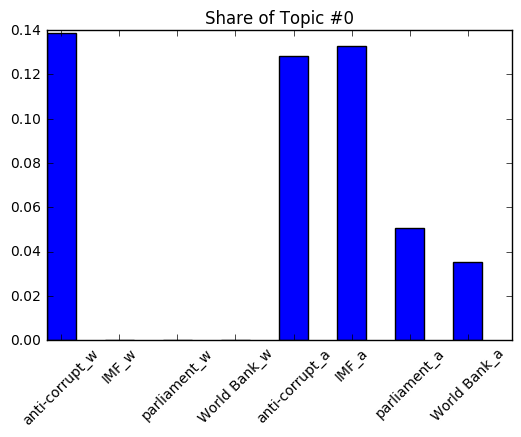

In [21]:
###############################
# WESTERN AND AFRICAN PLOTS 1 #
###############################

import matplotlib.pyplot as plt

N, K = doctopic_w_afr.shape

ind = np.arange(N)  # points on the x-axis

width = 0.5

plt.bar(ind, doctopic_w_afr[:,0], width=width)

xlabels = ['anti-corrupt_w','IMF_w','parliament_w','World Bank_w', 'anti-corrupt_a','IMF_a','parliament_a','World Bank_a']

plt.xticks(ind + width/2, xlabels, rotation=45) 

plt.title('Share of Topic #0')

plt.show()

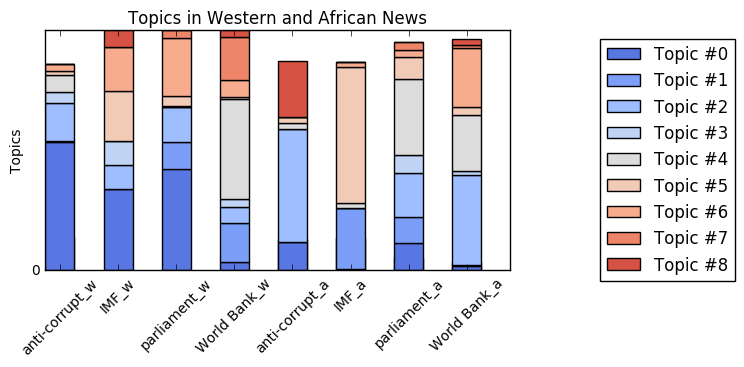

In [24]:
###############################
# WESTERN AND AFRICAN PLOTS 2 #
###############################

import numpy as np

import matplotlib.pyplot as plt

N, K = doctopic_w_afr.shape  # N documents, K topics

ind = np.arange(N)  # the x-axis locations for the novels

width = 0.5  # the width of the bars

plots = []

height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic_w_afr[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic_w_afr[:, k], width, bottom=height_cumulative, color=color)
        height_cumulative += doctopic_w_afr[:, k]
        plots.append(p)

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1

plt.ylabel('Topics') #y-axis label
plt.yticks(np.arange(0, 1, 10)) #y-axis ticks

plt.title('Topics in Western and African News') #plot title

xlabels = ['anti-corrupt_w','IMF_w','parliament_w','World Bank_w', 'anti-corrupt_a', 'IMF_a', 'parliament_a', 'World Bank_a'] #x-axis labels
plt.xticks(ind+width/2, xlabels, rotation=45) #placement and naming of x-axis ticks

topic_labels = ['Topic #{}'.format(k) for k in range(K)] # {} will become topic 1:K

# see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend for more details on making a legend in matplotlib

plt.legend([p[0] for p in plots], topic_labels, bbox_to_anchor=(1.5,1))

plt.subplots_adjust(bottom=0.3)

plt.show()

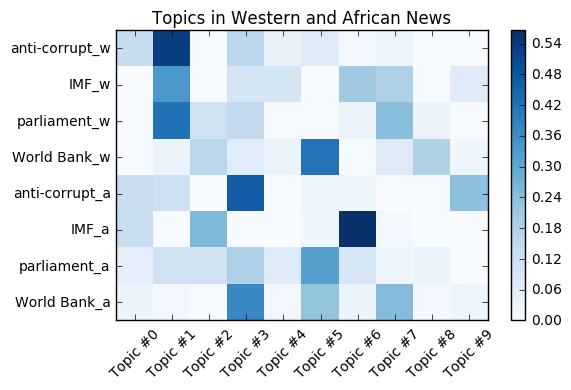

In [25]:
###############################
# WESTERN AND AFRICAN PLOTS 3 #
###############################

plt.pcolor(doctopic_w_afr, norm=None, cmap='Blues')

# put the major ticks at the middle of each cell
# the trailing semicolon ';' suppresses output

filenames = ['anti-corrupt_w','IMF_w','parliament_w','World Bank_w', 'anti-corrupt_a', 'IMF_a', 'parliament_a', 'World Bank_a'] #x-axis labels
topic_labels_w_afr = ['Topic #{}'.format(k) for k in range(K)]

plt.title('Topics in Western and African News')
plt.yticks(np.arange(doctopic_w_afr.shape[0])+0.5, filenames);
plt.xticks(np.arange(doctopic_w_afr.shape[1])+0.5, topic_labels_w_afr);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=45)

# add a legend
plt.colorbar(cmap='Blues')

plt.tight_layout()  # fixes margins

plt.show()

In [18]:
##################################################
# Calculating similarity/distances between texts #
##################################################

""" Arranging texts in a document-term matrix opens up a wide range of analytical possibilites. 
    For example, we can now calculate a quantitative measure of similarity/distance between two texts. 
    Since each row of the document-term matrix is a sequence of a novel’s word frequencies, 
    we can use mathematical notions of similarity (or distance) between sequences of numbers
    to calculate the similarity (or distance) between two documents.
    e.g. The Euclidean distance between two vectors in a plane is the length of the hypotenuse that joins the two vectors.
"""

from sklearn.manifold import MDS

from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(dtm_w_afr) #dtm for Western and African news articles

np.round(dist, 1)

#pairwise distances
print(dist[0, 1]) # document 0 is most similar to document 1 
print(dist[0, 2]) 
print(dist[0, 3]) # document 0 is most dissimilar to document 3
print(dist[0, 4])
print(dist[0, 5])
print(dist[0, 6])

"""Note: 
    document 0 = Western news articles about anti-corruption
    document 1 = Western news articles about the IMF 
    document 3 = Western news articles about African parliaments"""

44.7660585712
46.1627555503
64.652919501
56.0446250768
49.7292670366
49.6789693935


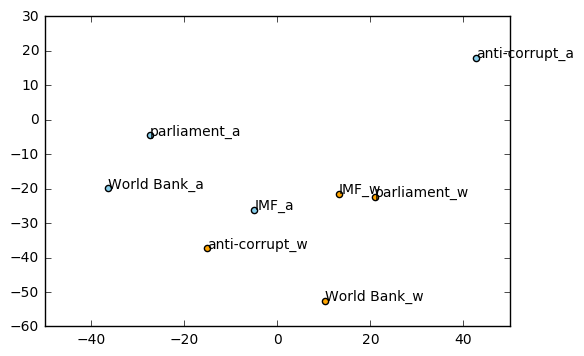

In [19]:
#########################
# Visualizing distances #
#########################

""" Sometimes it's useful to visualize pairwise distances between texts.
    A general approach to visualizing distances is to assign each text to a point in a plane, 
    where the distance between points is proportional to the pairwise distances between texts.
    This kind of visualization is known as “multidimensional scaling” (MDS).
"""
import matplotlib.pyplot as plt

# Plot points in a two-dimensional plane, n_components = 2 
# distance matrix was 'pre-computed' as dist variable
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)

xs, ys = pos[:, 0], pos[:, 1]

names = ['anti-corrupt_w','IMF_w','parliament_w','World Bank_w', 'anti-corrupt_a','IMF_a','parliament_a','World Bank_a']

for x, y, name in zip(xs, ys, names):
    color = 'orange' if "_w" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name) 

plt.show()

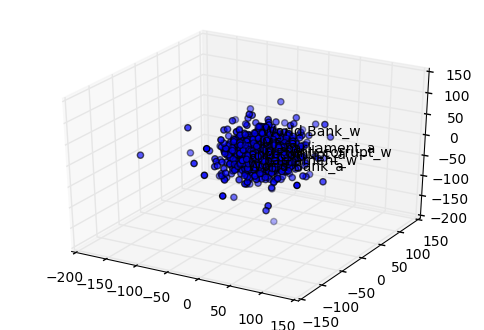

In [26]:
#We can also do MDS in three dimensions

from sklearn.manifold import MDS
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])

names = ['anti-corrupt_w','IMF_w','parliament_w','World Bank_w', 'anti-corrupt_a','IMF_a','parliament_a','World Bank_a']

for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s)

plt.show()

In [62]:
##############################
# Probabilistic Topic Models #
##############################

""" A topic model is a probabilistic model of the words appearing in a corpus of documents. 
    The topic model used in this section is Latent Dirichlet Allocation (LDA).
    LDA is a mixed-membership model.
    
    To create an LDA topic model, we are going to use MALLET, a Java-based package used for statistical natural language processing, 
    document classification, clustering, topic modeling, information extraction, and other machine learning applications to text.
    
    The following analysis proceeds in three steps:

    1. Download MALLET and run it directly in the terminal. It will fit a topic model on our corpus of documents.
    2. Load the output of MALLET into Python as a document-topic matrix (a 2-dimensional array) of topic shares.
    3. Analyze the topics, which are discrete distributions over the vocabulary.
"""

#Running MALLET
# Once MALLET is installed, the following terminal commands should download and extract MALLET (written for OSX):
# note: this will take a few minutes to run

# cd mallet-2.0.7
#./bin/mallet import-dir --input /users/Fiona_Shen_Bayh/2015/Web_Scraping/LexisNexis+Round+2/corruption_sentiment/ --output /tmp/topic-input-corruption.mallet --keep-sequence --remove-stopwords 
#./bin/mallet train-topics --input /tmp/topic-input-corruption.mallet --num-topics 10 --output-doc-topics /tmp/doc-topics-corruption.txt --output-topic-keys /tmp/topic-keys-corruption.txt --word-topic-counts-file /tmp/word_topic_counts.txt --random-seed 1


""" MALLET delivers the topic shares for each document into a file specified by the --output-doc-topics option.
    In this case we have provided the output filename /tmp/doc-topics-corruption.txt. 
    After running this code, MALLET will generate TXT files containing document topics, topic keys, and word counts
    we will use these TXT files below."""


import numpy as np

import itertools

import operator

import os

def grouper(n, iterable, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

doctopic_triples = []

mallet_docnames = []

with open("/tmp/doc-topics-corruption.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        mallet_docnames.append(docname)
        for topic, share in grouper(2, values):
            triple = (docname, int(topic), float(share))
            doctopic_triples.append(triple)

# sort the triples
# triple is (docname, topicnum, share) so sort(key=operator.itemgetter(0,1))
# sorts on (docname, topicnum) which is what we want
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

# sort the document names rather than relying on MALLET's ordering
mallet_docnames = sorted(mallet_docnames)

# collect into a document-term matrix
num_docs = len(mallet_docnames)

num_topics = len(doctopic_triples) // len(mallet_docnames)

# the following works because we know that the triples are in sequential order
doctopic = np.zeros((num_docs, num_topics))

for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

In [63]:
""" The following method is considerably faster. 
    It uses the itertools library which is part of the Python standard library."""

import itertools

import operator

doctopic = np.zeros((num_docs, num_topics))

for i, (doc_name, triples) in enumerate(itertools.groupby(doctopic_triples, key=operator.itemgetter(0))):
    doctopic[i, :] = np.array([share for _, _, share in triples])
    

In [64]:
search_documents = []

for fn in filenames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    search_documents.append(name)


# turn this into an array so we can use NumPy functions
search_documents = np.asarray(search_documents)

doctopic_orig = doctopic.copy()

# use method described in preprocessing section
num_groups = len(set(search_documents))

doctopic_grouped = np.zeros((num_groups, num_topics))

for i, name in enumerate(sorted(set(search_documents))):
    doctopic_grouped[i, :] = np.mean(doctopic[search_documents == name, :], axis=0)

doctopic = doctopic_grouped

doctopic #average topic shares associated with each document

/Users/Fiona_Shen_Bayh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 9 but corresponding boolean dimension is 8


array([[  1.15384615e-01,   9.61538462e-02,   9.61538462e-02,
          9.61538462e-02,   9.61538462e-02,   1.15384615e-01,
          9.61538462e-02,   9.61538462e-02,   9.61538462e-02,
          9.61538462e-02],
       [  2.93289308e-03,   1.79819365e-01,   8.79090997e-02,
          1.25065553e-01,   1.27959600e-01,   1.00689521e-01,
          8.67631349e-02,   1.46100806e-01,   6.99232786e-04,
          1.42060794e-01],
       [  2.19191659e-04,   1.29885353e-01,   3.63381651e-02,
          1.99626421e-01,   1.10034213e-01,   2.97147649e-02,
          6.38514834e-02,   2.79593257e-01,   2.66842020e-04,
          1.50470309e-01],
       [  1.22156415e-03,   1.45995974e-01,   1.70937301e-01,
          2.05171954e-01,   1.33433648e-01,   3.65670599e-02,
          7.79913347e-02,   9.91772139e-02,   6.37101063e-04,
          1.28866850e-01],
       [  8.48814669e-04,   1.32264589e-01,   3.31880516e-02,
          1.74049147e-01,   1.13831465e-01,   4.46259797e-02,
          6.77125348e-02

In [65]:
##############################
# Inspecting the topic model #
##############################

""" LDA is pretty good at reducing the dimensionality of our dtm. 
    Even though a topic model discards fine-grained information recorded in the matrix of word frequencies, 
    it preserves most of the salient details of the underlying matrix through the topic shares.
"""

os.chdir("/Users/Fiona_Shen_Bayh/2015/Web_Scraping/LexisNexis+Round+2/corruption_sentiment") #new file path
new_directory =  "/Users/Fiona_Shen_Bayh/2015/Web_Scraping/LexisNexis+Round+2/corruption_sentiment" #store file path as object
text_corpus = PlaintextCorpusReader(new_directory, '.*\.csv')

filenames = text_corpus.fileids()

filenames

from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(input='filename', decode_error='ignore')
    
dtm = vectorizer.fit_transform(filenames) 

dtm.shape
dtm.data.nbytes

# Let's look at the most significant topics for each document in the corpus.
# We're basically identifying the most frequent words in each text.

the_docs = sorted(set(search_documents))

print("Top topics in...")

for i in range(len(doctopic)):
    top_topics = np.argsort(doctopic[i,:])[::-1][0:3]
    top_topics_str = ' '.join(str(t) for t in top_topics)
    print("{}: {}".format(the_docs[i], top_topics_str))
    

Top topics in...
NYT+WP_Anti-Corrupt_copy: 5 0 9
NYT+WP_IMF_copy: 1 7 9
NYT+WP_PM_copy: 7 3 9
NYT+WP_wb_copy: 3 2 1
News_1_Afr: 7 3 9
News_2_Afr: 5 6 0
News_3_Afr: 0 5 4
News_4_Afr: 8 5 9


In [66]:
#####################
# Inspecting topics #
#####################

""" Each topic in the model can be individually inspected. 
    Each topic is a probalistic distribution of words associated with the topic and the strength of the association 
    (the posterior probability of finding a word associated with a topic). 

    Sometimes this distribution is called a topic-word distribution (AKA document-topic distribution). 
    This is best illustrated by inspecting the topic-word distributions provided by MALLET for our corruption corpus.
    MALLET places a subset of the topic-word distribution for each topic in a file specified by the command-line option --output-topic-keys. 
    In this case, I have named this file /tmp/topic-keys-corruption.txt. """

with open('/tmp/topic-keys-corruption.txt') as input:
    topic_keys_lines = input.readlines()
    
topic_words = []
for line in topic_keys_lines:
    _, _, words = line.split('\t')  # tab-separated
    words = words.rstrip().split(' ')  # remove the trailing '\n'
    topic_words.append(words)
    
# now we can get a list of the top words for topic 0 with topic_words[0]
topic_words[0]

['corruption',
 'africa',
 'south',
 'words',
 'political',
 'newspaper',
 'english',
 'investigations',
 'police',
 'public',
 'government',
 'uganda',
 'people',
 'kenya',
 'cape',
 'crime',
 'sh',
 'report',
 'news']

In [67]:
# we can also list the words associated with each topic

N_WORDS_DISPLAY = 10

for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:N_WORDS_DISPLAY])))

Topic 0: corruption africa south words political newspaper english investigations police public
Topic 1: president officials group democracy week south elections long police west
Topic 2: africa party minister south election political states mr police years
Topic 3: mr government country african people united military american kenya power
Topic 4: government time president national million leaders power public security called
Topic 5: corruption anti country public corrupt court development economic office cases
Topic 6: nigeria president kenya people government nation state commission law political
Topic 7: africa world bank countries oil states international economic aid million
Topic 8: corruption government mr acc commission words newspaper police people rwanda
Topic 9: year state years report day support part minister human official


In [68]:
######################
# Distinctive topics #
######################

""" Finding distinctive topics is similar to finding distinctive words. 
    The topic model helps us focus attention on recurrent patterns (co-occurrences) in word frequencies appearing in a corpus. 
    If we are interested in these patterns (rather than rare or idiosyncratic features of texts), 
        working with topics tends to be easier than working with word frequencies."""

# Here, simple difference-in-averages provides an easy way of finding topics that 
# tend to be associated more strongly with World Bank articles than with IMF articles

wb_indices, imf_indices = [], []

for index, fn in enumerate(sorted(set(search_terms))):
    if "wb" in fn:
        wb_indices.append(index)
    elif "IMF" in fn:
        imf_indices.append(index)

wb_avg = np.mean(doctopic[wb_indices, :], axis=0)

imf_avg = np.mean(doctopic[imf_indices, :], axis=0)

keyness = np.abs(wb_avg - imf_avg)

ranking = np.argsort(keyness)[::-1]  # from highest to lowest; [::-1] reverses order in Python sequences

# These are topics (ranked in order) that are more likely to be associated with World Bank articles than IMF articles
ranking

array([2, 3, 5, 7, 1, 9, 6, 4, 0, 8])

In [73]:
#To estimate the strength of association between a given word and a given topic we need the information saved in the file
#specified by the MALLET option --word-topic-counts-file, here /tmp/word-topic.txt

#./bin/mallet evaluate-topics --input /tmp/topic-input-corruption.mallet --output-word-topics-counts-file /tmp/word-topic-corruption.txt  --random-seed 1

import numpy as np

import os

num_topics = 10

mallet_vocab = []

word_topic_counts = []

with open("/tmp/word_topic_counts.txt") as f:
    for line in f:
        _, word, *topic_count_pairs = line.rstrip().split(' ')
        topic_count_pairs = [pair.split(':') for pair in topic_count_pairs]
        mallet_vocab.append(word)
        counts = np.zeros(num_topics)
        for topic, count in topic_count_pairs:
            counts[int(topic)] = int(count)
            word_topic_counts.append(counts)

word_topic = np.array(word_topic_counts)

word_topic.shape

(57999, 10)

In [74]:
#####################################
# MEASURING TOPIC WORD ASSOCIATIONS #
#####################################

""" Sizing words according to strength of association with a topic
    
    Each topic is a distribution over the vocabulary of words found in the corpus. 
    The top words (saved via the --topic-keys option) are those words most likely to be found in each topic.
    Displaying the top words does not, however, convey any information about the probability of finding a top word assigned to a specific topic. 
    This is often critical information, where we can think of this probability as the ‘strength of association’ between a word and a topic.
    For example, the top five words of topic 1 may be much more strongly associated with the topic than the top five words of topic 2. 
    In some cases this can be extreme, the tenth top word for topic 1 may hardly ever be associated with topic 1, whereas the tenth top word for topic 2 may be assigned frequently to topic 2. 
    Moreover, if most of the words in the vocabulary are equally associated with a topic then identifying the “top 10 words” is misleading.

    To estimate the strength of association between a given word and a given topic we need the information saved in the file 
    specified by the MALLET option --word-topic-counts-file, here /tmp/word-topic-corruption.txt"""

print(topic_words)

word_topic = word_topic / np.sum(word_topic, axis=0)

[['corruption', 'africa', 'south', 'words', 'political', 'newspaper', 'english', 'investigations', 'police', 'public', 'government', 'uganda', 'people', 'kenya', 'cape', 'crime', 'sh', 'report', 'news'], ['president', 'officials', 'group', 'democracy', 'week', 'south', 'elections', 'long', 'police', 'west', 'won', 'nations', 'including', 'kenyan', 'run', 'nation', 'announced', 'interview', 'international'], ['africa', 'party', 'minister', 'south', 'election', 'political', 'states', 'mr', 'police', 'years', 'zimbabwe', 'prime', 'mandela', 'kibaki', 'city', 'today', 'year', 'news', 'foreign'], ['mr', 'government', 'country', 'african', 'people', 'united', 'military', 'american', 'kenya', 'power', 'western', 'percent', 'mobutu', 'moi', 'france', 'opposition', 'war', 'army', 'months'], ['government', 'time', 'president', 'national', 'million', 'leaders', 'power', 'public', 'security', 'called', 'top', 'head', 'told', 'local', 'life', 'forces', 'members', 'past', 'work'], ['corruption', 'an

In [75]:
# np.sum(word_topic, axis=0) sums across rows, so it yields totals of words assigned to topics
word_topic = word_topic / np.sum(word_topic, axis=0)

num_top_words = 10

mallet_vocab = np.array(mallet_vocab)  # convert vocab from a list to an array so we can use NumPy operations on it

for t in range(num_topics):
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = mallet_vocab[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    print("Topic #{}:".format(t))
    for word, share in zip(top_words, top_words_shares):
        print("{} : {}".format(np.round(share, 3), word))

Topic #0:
0.014 : joseph
0.014 : program
0.014 : vaccine
0.014 : foundation
0.005 : insists
0.005 : wrong
0.005 : hasn
0.005 : fines
0.005 : evidence
0.005 : possibly
Topic #1:
0.01 : illegal
0.01 : commended
0.01 : community
0.01 : global
0.01 : alliance
0.005 : unam
0.005 : ujaha
0.004 : november
0.004 : procuring
0.004 : goods
Topic #2:
0.008 : wrong
0.008 : evidence
0.008 : hasn
0.008 : insists
0.008 : fines
0.008 : amandla
0.008 : servicees
0.008 : smit
0.008 : pty
0.006 : hand
Topic #3:
0.019 : tsvangirai
0.019 : morgan
0.019 : freed
0.019 : impersonation
0.009 : dr
0.009 : kisito
0.009 : officer
0.009 : medical
0.009 : chief
0.009 : sheku
Topic #4:
0.012 : dr
0.012 : chief
0.012 : sheku
0.012 : kisito
0.012 : officer
0.012 : medical
0.006 : forgotten
0.006 : weeks
0.006 : illegal
0.006 : commended
Topic #5:
0.029 : foundation
0.029 : vaccine
0.029 : program
0.029 : joseph
0.005 : melinda
0.005 : gates
0.005 : bill
0.004 : subject
0.004 : length
0.004 : city
Topic #6:
0.009 : out

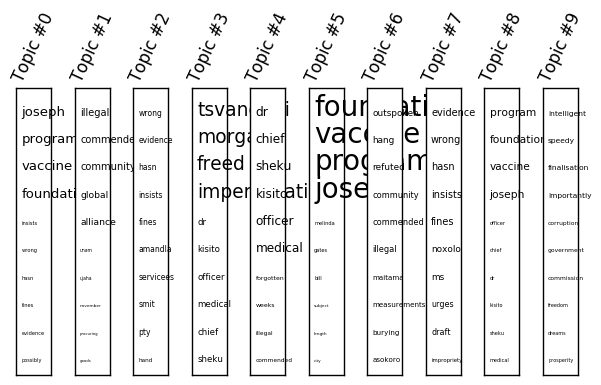

In [150]:
#######################################
# VISUALIZING TOPIC WORD ASSOCIATIONS #
#######################################

#One way to visualize this information is to size each word in proportion to its share of words associated with each topic:

import matplotlib.pyplot as plt

num_top_words = 10

fontsize_base = 20 / np.max(word_topic) # font size for word with largest share in corpus

for t in range(num_topics):
    plt.subplot(1, num_topics, t+1)  # numrows, numcols, fignum, where fignum ranges from 1 to numrows*numcols
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xlim(0, 2)
    plt.xticks([]) # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t), rotation=65, y=1.2)
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = mallet_vocab[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base*share) 

plt.tight_layout() #automatically adjusts subplot params so that the subplot(s) fits in to the figure area. This is an experimental feature and may not work for some cases

plt.savefig('myfig.png') #command has to be called before plt.show()
plt.show() 

# Below we see that topic 5 has the highest concentration of certain word types.

In [151]:
""" Another way of looking at patterns of word associations is to calculate the number of word types associated with each topic"""

np.sum(word_topic > 0, axis=0) 

# Topic 2 has the most diverse vocabulary
# Topic 8 has the least diverse vocabulary 

array([8069, 8508, 9044, 8740, 8421, 8455, 8099, 8544, 7468, 8531])